# Exercise 1

Name: Charles Kevin Bandala

Student number: 202220041

In [1]:
library(fpp2)
library(ggplot2)
library(nortest)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.5 --

v ggplot2   3.4.1     v fma       2.5  
v forecast  8.21      v expsmooth 2.3  





1) Monthly Data (PhilMonthlyData.csv, available at UVLe): Please use from January 2000 to
December 2009. Using the ofw_deployed (Number of OFW Deployed, in Persons) series, answer the
following questions:

In [4]:
Philmonth <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilMonthlyData.csv", header = TRUE)

ofw_deployed <- ts(na.omit(Philmonth$ofw_deployed), start = c(2000, 1), end = c(2009, 12), frequency = 12)

ofw_deployed

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,100349.00,67935.00,62026.00,73905.00,80691.00,74926.00,68711.00,74136.00,66509.00,59933.00,59953.00,52554.00
2001,100349.00,64507.00,65043.00,74619.00,83637.00,75446.00,70849.00,77165.00,71007.00,65619.00,63331.00,54275.00
2002,98818.00,66380.00,66628.00,87547.00,84878.00,79918.00,75322.00,77887.00,71482.00,66195.00,61153.00,53673.00
2003,103857.18,71113.00,69151.00,79172.00,74538.00,68822.00,62587.00,71127.00,74655.00,62954.00,70797.00,66618.00
2004,100597.00,83062.00,73166.00,74674.00,84067.00,78381.00,75615.00,80578.00,74007.00,70659.00,72319.00,66463.00
2005,105911.00,81334.00,78381.00,101120.00,91337.00,83118.00,81479.63,87041.43,82394.83,75934.83,76373.43,69579.43
2006,103714.00,89319.00,82694.00,92076.00,103528.00,91872.00,86635.19,92196.99,87550.39,81090.39,81528.99,74734.99
2007,96584.00,77462.00,83751.00,92723.00,108894.00,89458.00,94472.00,92985.00,93836.00,88064.00,81530.00,73643.00
2008,132285.00,90323.00,99432.00,123491.00,131171.00,128894.00,121435.00,123071.00,120860.00,109432.00,106630.00,89799.00
2009,154006.00,98308.00,75892.00,122871.00,141836.00,131235.00,121681.00,125669.00,104007.00,96240.00,112388.00,98445.75


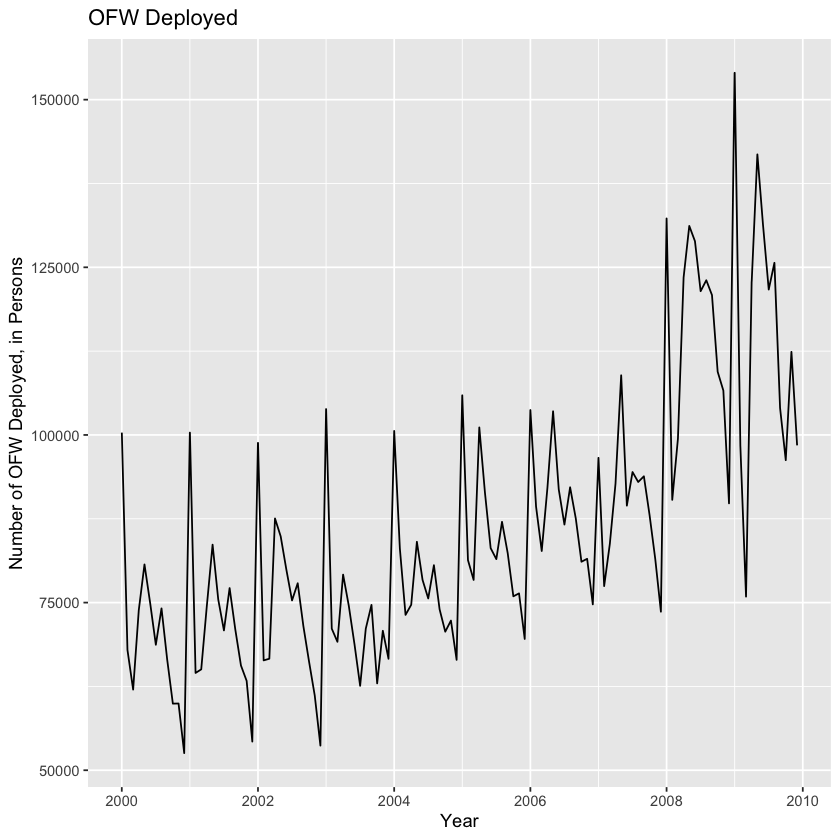

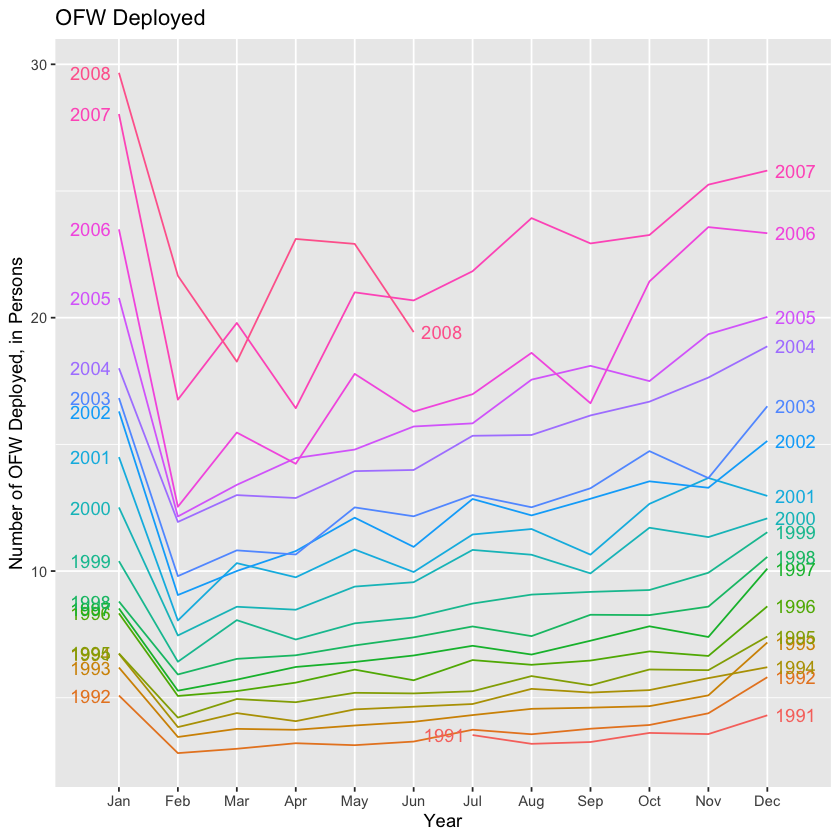

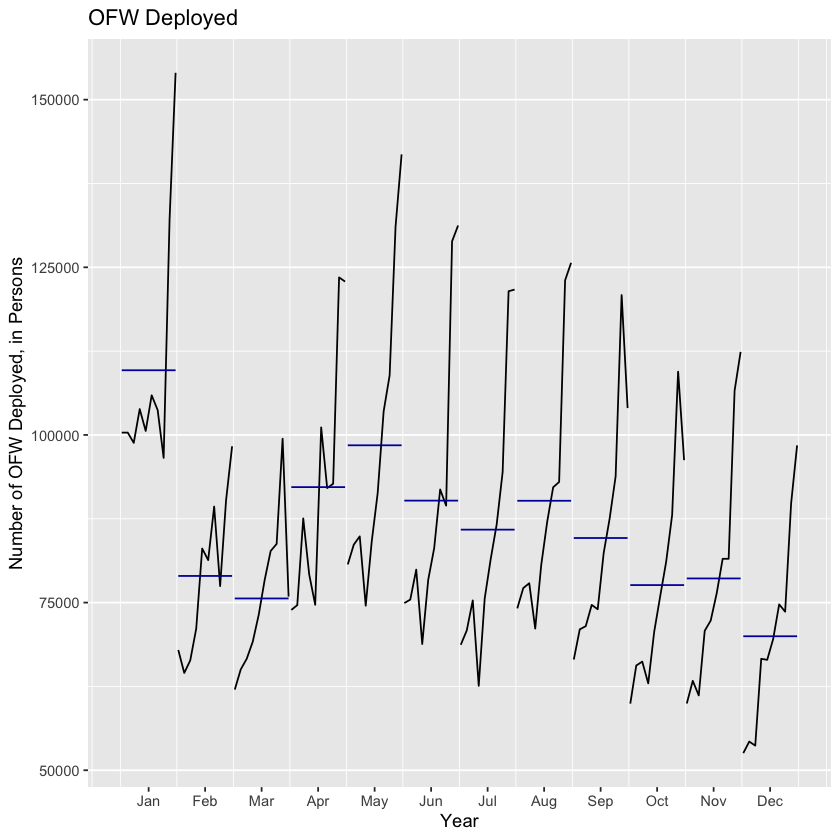

In [3]:
autoplot(ofw_deployed) +
  ggtitle("OFW Deployed") +
  xlab("Year") +
  ylab("Number of OFW Deployed, in Persons")

ggseasonplot(a10, year.labels=TRUE, year.labels.left=TRUE) +
  ggtitle("OFW Deployed") +
  xlab("Year") +
  ylab("Number of OFW Deployed, in Persons")

ggsubseriesplot(ofw_deployed) +
  ggtitle("OFW Deployed") +
  xlab("Year") +
  ylab("Number of OFW Deployed, in Persons")

a) Using plots, describe in at least 2 sentences the trend and seasonality of the time series data.

The trend does not clearly appear from until 2004. However, throughout the series, the trend generally goes upward. The series also  shows a strong seasonality within each year. The number of OFW deployed decreases as it approaches the end of each year (maybe because of the Christmas season). Among the months, January has the highest number then it decreases to its lowest, which is February. With the ggsubseriesplot(), the mean each month decreases from May to December. 

b) What Box-Cox transformation would achieve a stable variance for the data?

[1] 0.009887901

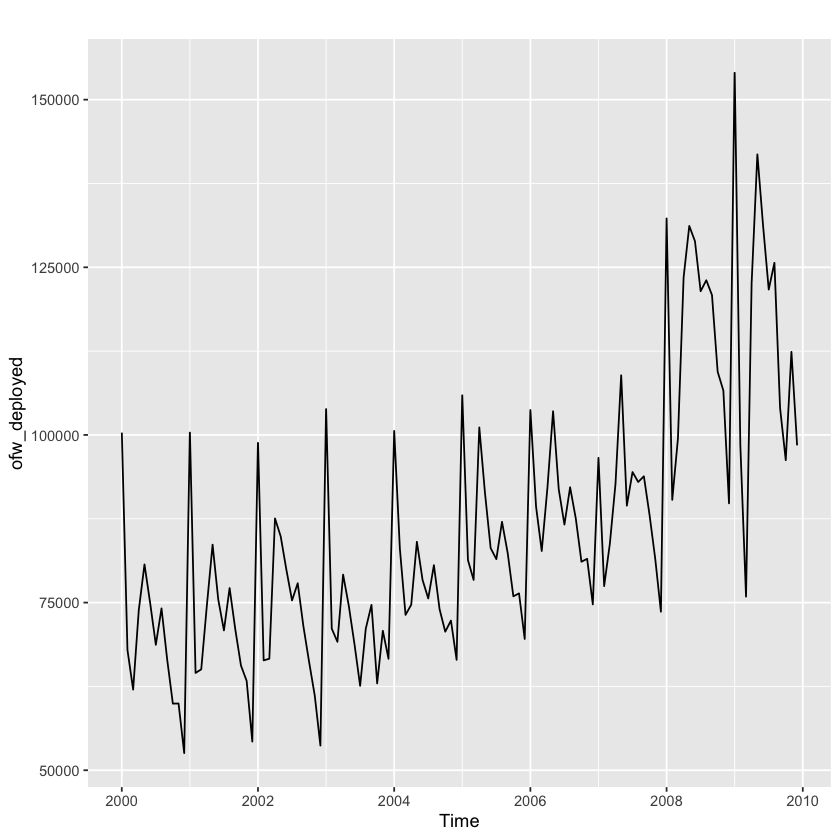

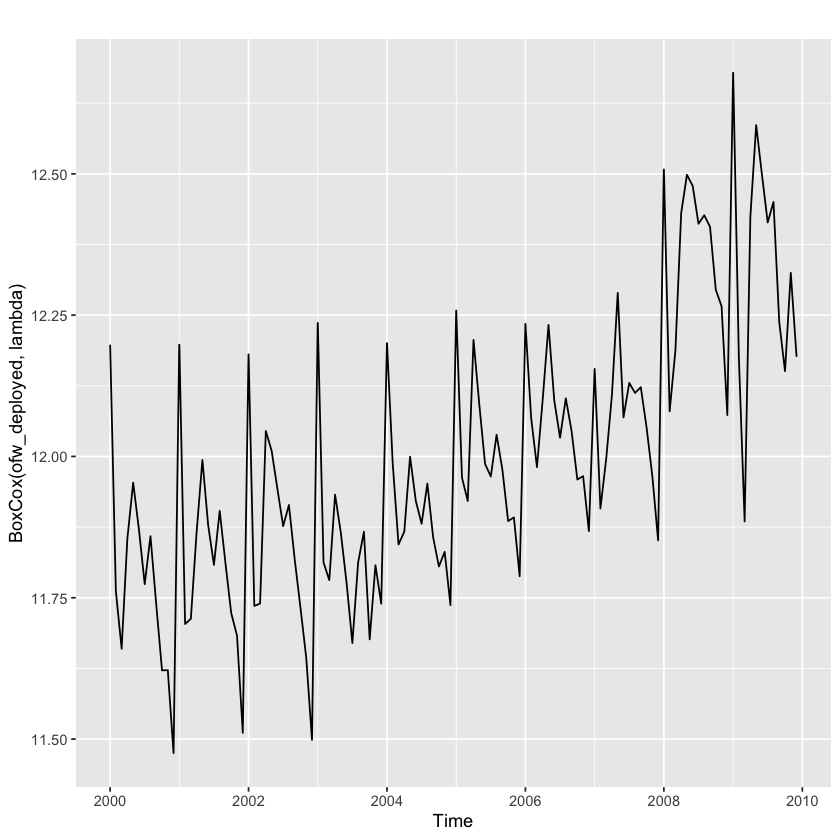


	Ljung-Box test

data:  Residuals
Q* = 498.22, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



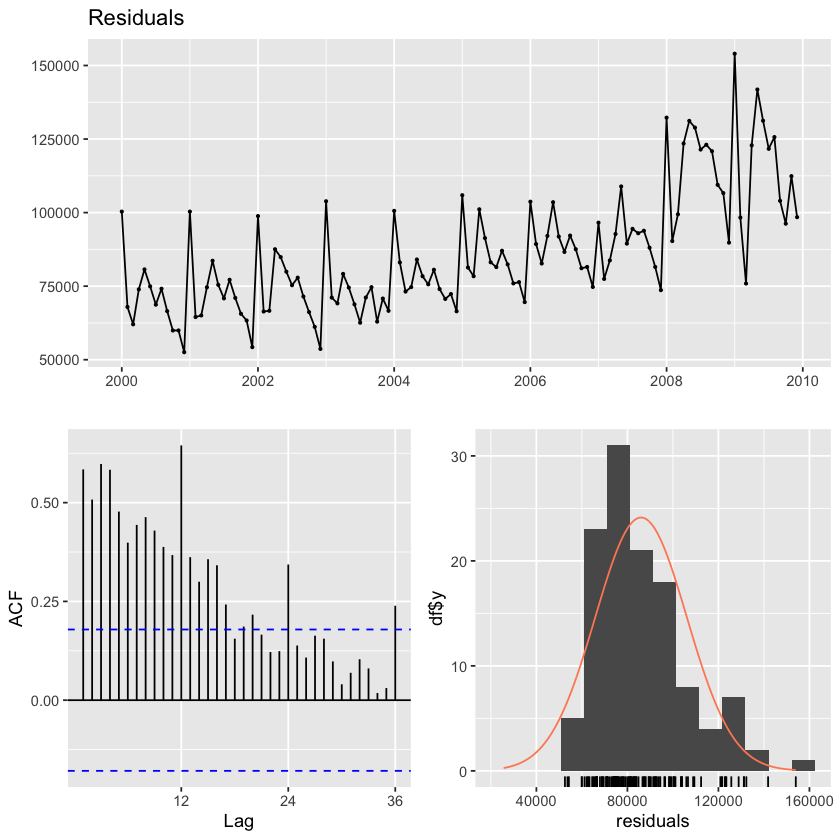

In [5]:
(lambda <- BoxCox.lambda(ofw_deployed))
autoplot(ofw_deployed)
autoplot(BoxCox(ofw_deployed, lambda))

checkresiduals(ofw_deployed)

The optimal λ value is 0.009887901195916, as given by the BoxCox.lambda() function. The function implies a slight modification in the plot. In addition, lambda value is more appreciated if applied to prediction intervals.

c) Split the data in which the most recent 2 years of data will be the test dataset. Using the
forecasting approaches discussed in Chapter 3, which of the methods would best forecast the data?
Explain your answer in at least 2 sentences.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,100349.00,67935.00,62026.00,73905.00,80691.00,74926.00,68711.00,74136.00,66509.00,59933.00,59953.00,52554.00
2001,100349.00,64507.00,65043.00,74619.00,83637.00,75446.00,70849.00,77165.00,71007.00,65619.00,63331.00,54275.00
2002,98818.00,66380.00,66628.00,87547.00,84878.00,79918.00,75322.00,77887.00,71482.00,66195.00,61153.00,53673.00
2003,103857.18,71113.00,69151.00,79172.00,74538.00,68822.00,62587.00,71127.00,74655.00,62954.00,70797.00,66618.00
2004,100597.00,83062.00,73166.00,74674.00,84067.00,78381.00,75615.00,80578.00,74007.00,70659.00,72319.00,66463.00
2005,105911.00,81334.00,78381.00,101120.00,91337.00,83118.00,81479.63,87041.43,82394.83,75934.83,76373.43,69579.43
2006,103714.00,89319.00,82694.00,92076.00,103528.00,91872.00,86635.19,92196.99,87550.39,81090.39,81528.99,74734.99
2007,96584.00,77462.00,83751.00,92723.00,108894.00,89458.00,94472.00,92985.00,93836.00,88064.00,81530.00,73643.00


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,132285.00,90323.00,99432.00,123491.00,131171.00,128894.00,121435.00,123071.00,120860.00,109432.00,106630.00,89799.00
2009,154006.00,98308.00,75892.00,122871.00,141836.00,131235.00,121681.00,125669.00,104007.00,96240.00,112388.00,98445.75


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.759462e-12,12578.09,10191.72,-2.575749,13.24343,1.943959,0.2649739,NA
Test set,3.621797e+04,40477.82,36456.73,29.662748,29.97735,6.953721,0.0407695,1.467524


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-281.1158,15160.47,10503.17,-2.021261,12.91051,2.003364,-0.4254810,NA
Test set,41332.0730,45111.56,41332.07,34.230106,34.23011,7.883639,0.0407695,1.634235


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2759.214,6758.578,5242.766,3.228857,6.524772,1.000000,0.3063717,NA
Test set,25524.906,28484.895,26179.823,21.107609,21.970568,4.993513,-0.0721935,1.0501


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.685080e-12,15157.86,10446.95,-1.654222,12.81283,1.992640,-0.42548097,NA
Test set,4.484602e+04,48303.43,44846.02,37.402216,37.40222,8.553885,0.04081535,1.756954


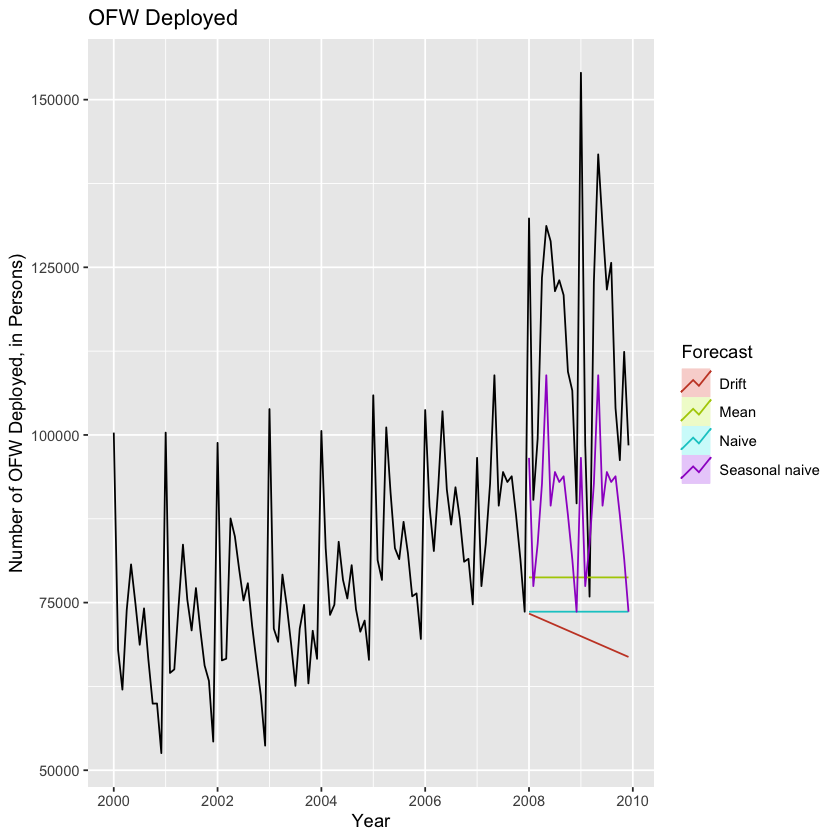

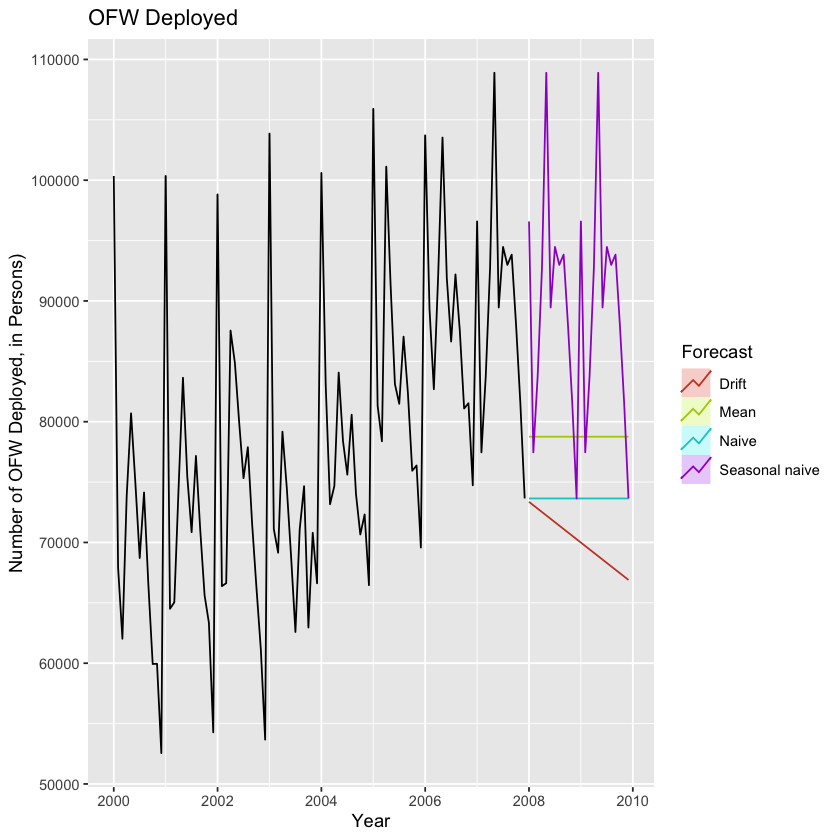

In [6]:
ofw_train <- window(ofw_deployed, end = c(2007, 12)) # ends in 2007
ofw_test <- window(ofw_deployed, start = c(2008, 1)) # begins in 2008 onwards

# Display the train & test data
ofw_train
ofw_test

# Mean Forecast
ofw_fit1 <- meanf(ofw_train, h = 24)

# Naive Foreast
ofw_fit2 <- rwf(ofw_train, h = 24)

# Seasonal Naive
ofw_fit3 <- snaive(ofw_train, h = 24)

# Drift
ofw_fit4 <- rwf(ofw_train, drift = TRUE, h = 24)

accuracy(ofw_fit1, ofw_test) # mean
accuracy(ofw_fit2, ofw_test) # naive
accuracy(ofw_fit3, ofw_test) # seasonal naive
accuracy(ofw_fit4, ofw_test) # drift

autoplot(ofw_deployed) +
  autolayer(ofw_fit1, series="Mean", PI=FALSE) +
  autolayer(ofw_fit2, series="Naive", PI=FALSE) +
  autolayer(ofw_fit3, series="Seasonal naive", PI=FALSE) +
  autolayer(ofw_fit4, series="Drift", PI=FALSE) +
  xlab("Year") + ylab("Number of OFW Deployed, in Persons)") +
  ggtitle("OFW Deployed") +
  guides(colour=guide_legend(title="Forecast"))

autoplot(ofw_train) +
  autolayer(ofw_fit1, series="Mean", PI=FALSE) +
  autolayer(ofw_fit2, series="Naive", PI=FALSE) +
  autolayer(ofw_fit3, series="Seasonal naive", PI=FALSE) +
  autolayer(ofw_fit4, series="Drift", PI=FALSE) +
  xlab("Year") + ylab("Number of OFW Deployed, in Persons)") +
  ggtitle("OFW Deployed") +
  guides(colour=guide_legend(title="Forecast"))

The mean and naive do not capture the trend or seasonality of the series. For the drift method, it detects the assumed trend of the train data (which is going down) in the series. For seasonal naive, it somewhat captures the seasonality pattern but differ in values. Looking at the summary of their accuracy, seasonal naive is the best method.

2) Quarterly Data (PhilQuarterData.csv, available at UVLe): Please use from Quarter 1 1994 to
Quarter 4 2008. Using agri (Gross Value Added of Agriculture, Forestry, and Fisheries in the Philippines,
in Million Php), answer for the following questions:

In [31]:
Philquarter <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilQuarterData.csv", header = TRUE)

# Philquater data

agri <- ts(Philquarter$agri, start = 1981, frequency = 4)
agri

# Quarter 1, 1994 to Quarter 4, 2008
agri2 <- window(agri, start = c(1994, 1), end = c(2008, 4))
agri2

,Qtr1,Qtr2,Qtr3,Qtr4
1981,36714.00,38364.00,30711.00,42690.00
1982,35840.00,39637.00,28460.00,45704.00
1983,36655.00,38794.00,28444.00,40693.00
1984,36149.00,38859.00,27392.00,40847.00
1985,35511.00,37902.00,26718.00,40423.00
1986,36063.00,39093.00,28798.00,41771.00
1987,36998.00,40836.00,29881.00,42699.00
1988,37211.00,38893.00,33880.00,45308.00
1989,39503.00,38150.00,35148.00,47163.00
1990,39396.00,38632.00,35477.00,47229.00


,Qtr1,Qtr2,Qtr3,Qtr4
1994,43353.00,40466.00,35620.00,51951.00
1995,44467.00,40045.00,37608.00,50728.00
1996,45425.00,42938.00,38885.00,52203.00
1997,46814.00,44699.00,38769.00,54722.00
1998,46004.00,38992.00,37680.00,50525.00
1999,47481.00,42746.00,39839.00,54398.00
2000,47743.00,44564.00,42896.00,57254.00
2001,49190.00,46336.00,44260.00,59803.00
2002,52441.63,46866.94,44696.39,63475.28
2003,54151.02,47167.58,47176.77,66777.39


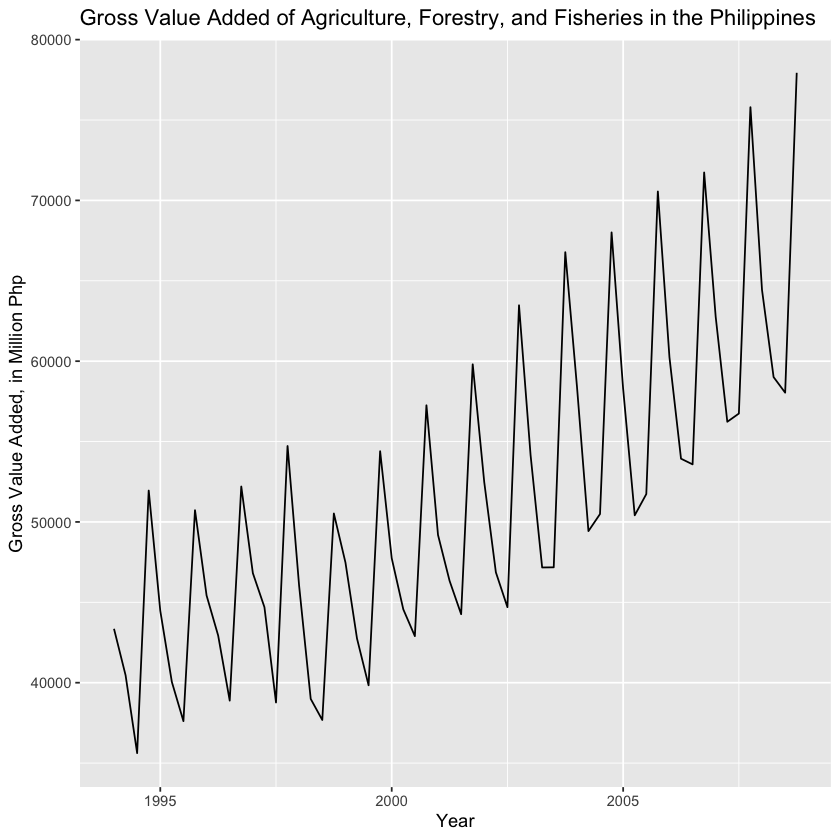

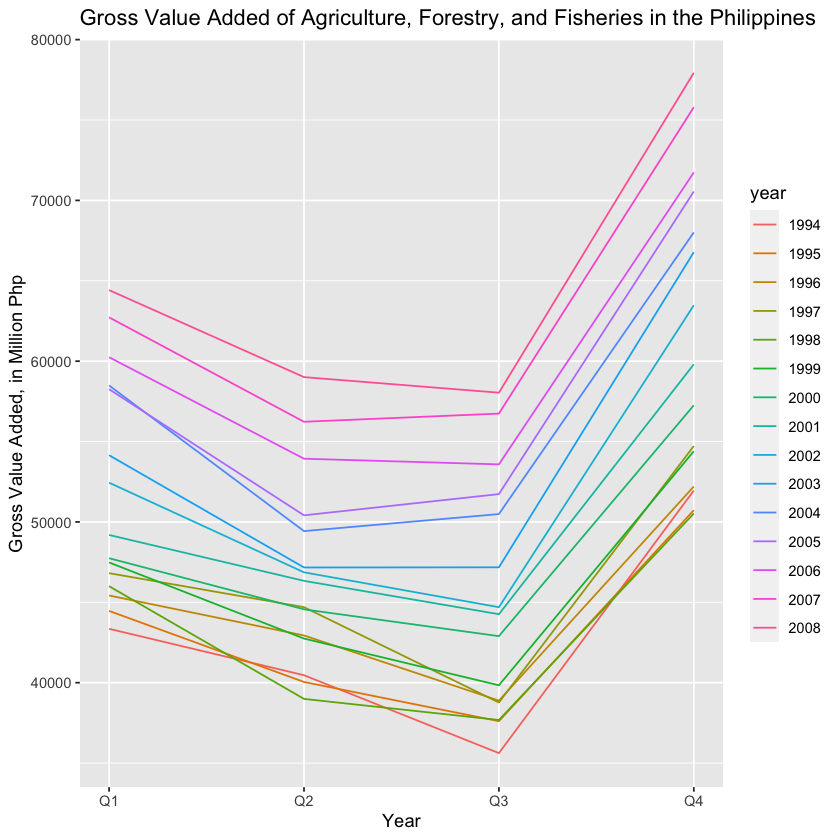

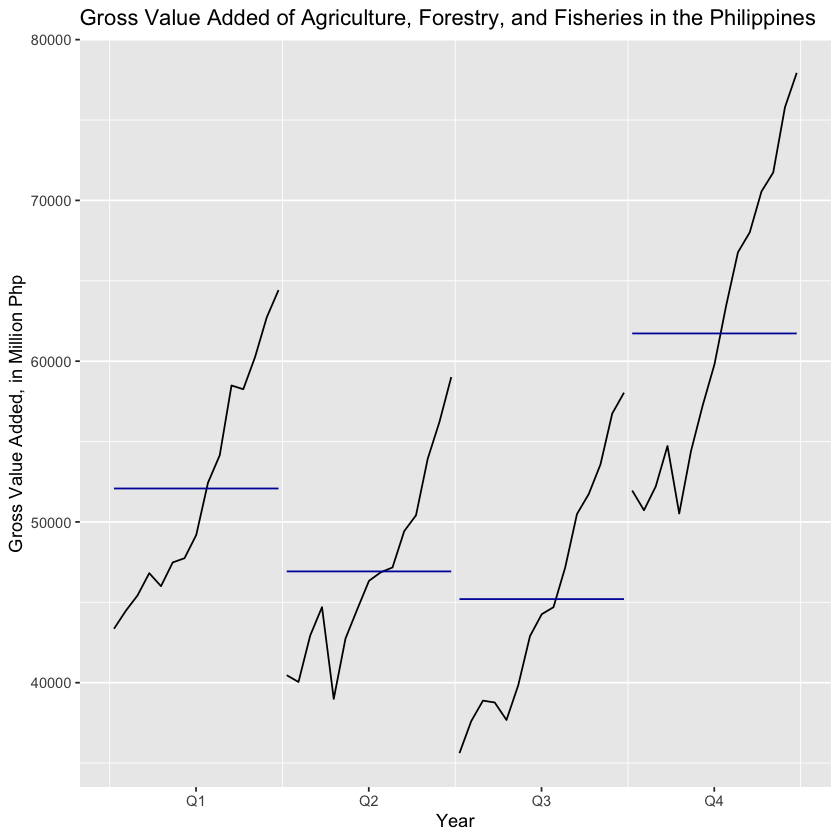

In [15]:
# Different plots of Philquater data
autoplot(agri2) +
  ggtitle("Gross Value Added of Agriculture, Forestry, and Fisheries in the Philippines") +
  xlab("Year") +
  ylab("Gross Value Added, in Million Php")

ggseasonplot(agri2) +
  ggtitle("Gross Value Added of Agriculture, Forestry, and Fisheries in the Philippines") +
  xlab("Year") +
  ylab("Gross Value Added, in Million Php")

ggsubseriesplot(agri2) +
  ggtitle("Gross Value Added of Agriculture, Forestry, and Fisheries in the Philippines") +
  xlab("Year") +
  ylab("Gross Value Added, in Million Php")

a) Using plots, describe in at least 2 sentences the trend and seasonality of the time series data.

The trend is clear enough that the series goes upward. Using the ggseasonplot() and ggsubseriesplot(), it can confirm the seasonality of the series. 4th quarters have the highest values among the rest. Gross value decreases as it approaches 3rd quarter (lowest value) from 1st quarter. 

b) What Box-Cox transformation would achieve a stable variance for the data?

[1] -0.1779247

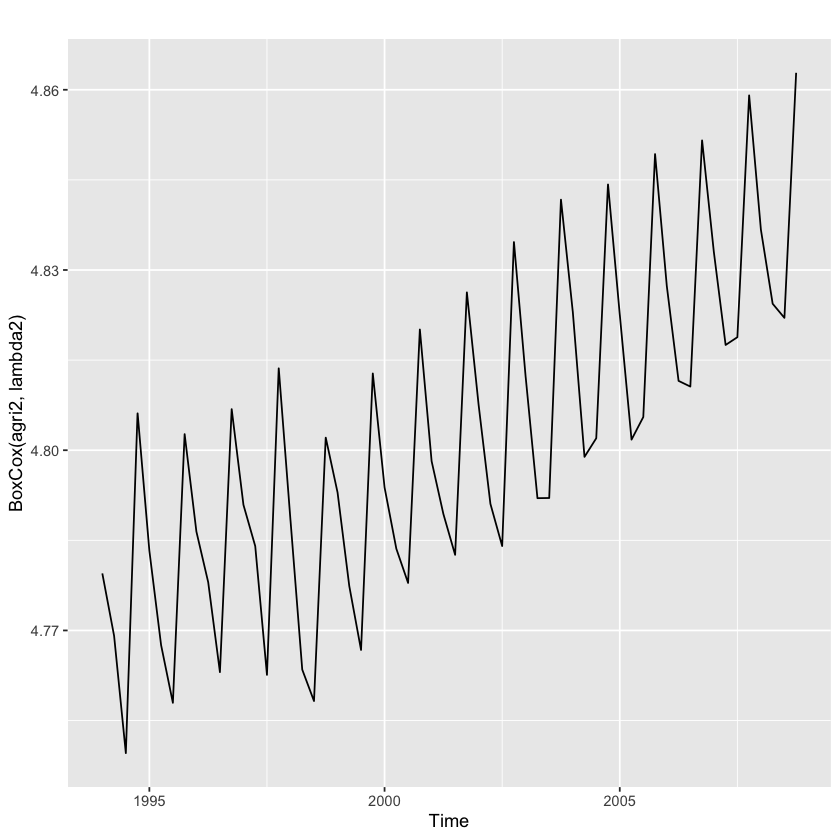


	Ljung-Box test

data:  Residuals
Q* = 125.42, df = 8, p-value < 2.2e-16

Model df: 0.   Total lags used: 8



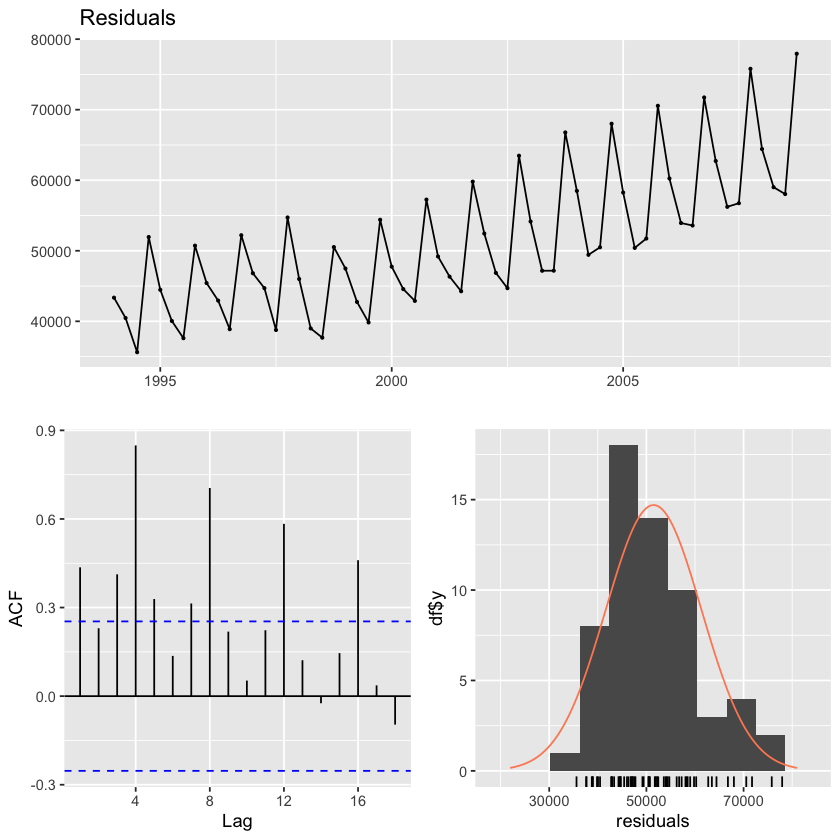

In [33]:
(lambda2 <- BoxCox.lambda(agri2))
autoplot(BoxCox(agri2, lambda2))

checkresiduals((agri2))

The optimal λ value is -0.177924669974128, as given by the BoxCox.lambda() function. The function implies a slight modification in the plot. Histogram seems to follow a normal distribution.

c) Split the data in which the most recent 4 years of data will be the test dataset. Using the
forecasting approaches discussed in Chapter 3, which of the methods would best forecast the data?
Explain your answer in at least 2 sentences.

In [12]:
agri_train <- window(agri2, end = c(2004, 4)) # ends in 2004
agri_test <- window(agri2, start = c(2005, 1)) # begins in 2005 onwards

# Display the train & test data
agri_train
agri_test

# Mean Forecast
agri_fit1 <- meanf(agri_train, h = 16)

# Naive Foreast
agri_fit2 <- rwf(agri_train, h = 16)

# Seasonal Naive
agri_fit3 <- snaive(agri_train, h = 16)

# Drift
agri_fit4 <- rwf(agri_train, drift = TRUE, h = 16)

accuracy(agri_fit1, agri_test) # mean
accuracy(agri_fit2, agri_test) # naive
accuracy(agri_fit3, agri_test) # seasonal naive
accuracy(agri_fit4, agri_test) # drift

autoplot(agri2) +
  autolayer(agri_fit1, series="Mean", PI=FALSE) +
  autolayer(agri_fit2, series="Naive", PI=FALSE) +
  autolayer(agri_fit3, series="Seasonal naive", PI=FALSE) +
  autolayer(agri_fit4, series="Drift", PI=FALSE) +
  xlab("Year") + ylab("Gross Value Added of Agriculture, Forestry, and Fisheries in the Philippines)") +
  ggtitle("Gross Value Added, in Million Php") +
  guides(colour=guide_legend(title="Forecast"))

autoplot(agri_train) +
  autolayer(agri_fit1, series="Mean", PI=FALSE) +
  autolayer(agri_fit2, series="Naive", PI=FALSE) +
  autolayer(agri_fit3, series="Seasonal naive", PI=FALSE) +
  autolayer(agri_fit4, series="Drift", PI=FALSE) +
  xlab("Year") + ylab("Gross Value Added of Agriculture, Forestry, and Fisheries in the Philippines)") +
  ggtitle("Gross Value Added, in Million Php") +
  guides(colour=guide_legend(title="Forecast"))

ERROR: Error in window(agri2, end = c(2004, 4)): object 'agri2' not found


In [11]:
fitted(agri_fit3)

ERROR: Error in fitted(agri_fit3): object 'agri_fit3' not found


The mean and naive do not capture the trend of seasonality of the series. The drift method detects trend of the series to go upwards. Lastly, seasonal naive captured the seasonality pattern of the data but failed to detect the trend. Based on their accuracy, seasonal naive is the best method among the methods.